This question involves the use of multiple linear regression on the
[`Auto`](https://www.statlearning.com/s/Auto.csv) data set.

a.  Produce a scatterplot matrix which includes all of the variables in
    the data set.


In [2]:
##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.datasets as smd 
import statsmodels.api as sm
import statsmodels.graphics as smg

In [3]:
auto = smd.get_rdataset('Auto', 'ISLR')
auto.data 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


b.  Compute the matrix of correlations between the variables using the
    function `corr()`.


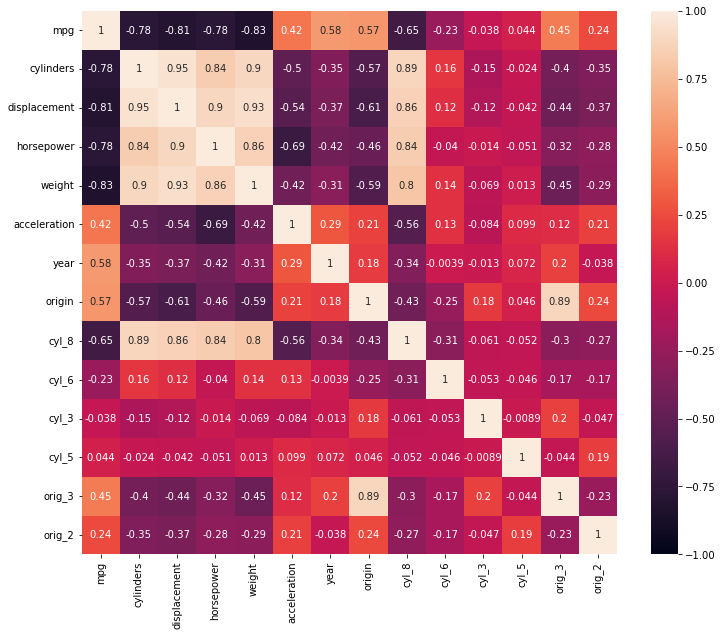

In [14]:
##
plt.figure(figsize=(12, 10))
sns.heatmap(auto.data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

c. Perform a multiple linear regression with `mpg` as the response and
   all other variables except `name` as the predictors. Use the
   `summary()` function to print the results. Comment on the output.
   For instance:

   -   Is there a relationship between the predictors and the response?

   -   Which predictors appear to have a statistically significant
       relationship to the response?

   -   What does the coefficient for the year variable suggest?

    

In [5]:
for level in auto.data.cylinders.unique():
    if level!=4:
        auto.data[f'cyl_{level}'] = 1*(auto.data.cylinders==level)

for level in auto.data.origin.unique():
    if level!=1:
        auto.data[f'orig_{level}'] = 1*(auto.data.origin==level)


In [6]:
##
predictors = list(auto.data.columns) 
predictors.remove('mpg')
predictors.remove('name')
predictors.remove('origin')
predictors.remove('cylinders')

formula = 'mpg ~ ' + '+'.join(predictors)
print(formula)
result = sm.formula.ols(formula, auto.data).fit()
print(result.summary().as_text())

mpg ~ displacement+horsepower+weight+acceleration+year+cyl_8+cyl_6+cyl_3+cyl_5+orig_3+orig_2
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          2.39e-147
Time:                        07:20:29   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

d. Produce diagnostic plots of the linear regression fit. (standardized
   residuals vs fitted values, normal $q-q$ plot, leverage vs fitted
   values, Cook's distance).

   Comment on any problems you see with the fit. Do the residual plots
   suggest any unusually large outliers? Does the leverage plot
   identify any observations with unusually high leverage?

    

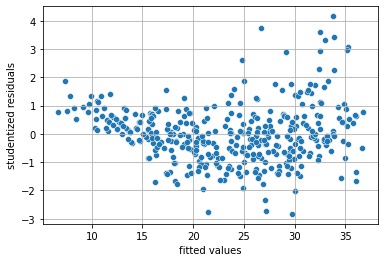

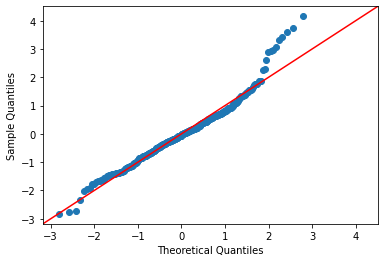

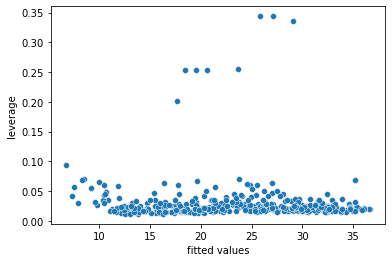

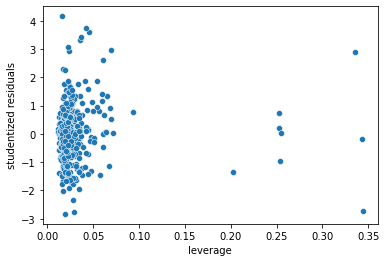

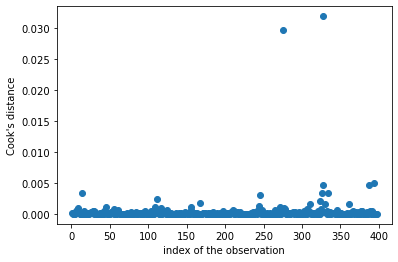

In [8]:
##
sigma = result.scale**0.5
leverage = result.get_influence().hat_matrix_diag
student_resid = result.resid/(sigma*(1-leverage)**0.5) 
sns.scatterplot(x=result.fittedvalues, y=student_resid)
plt.grid()
plt.xlabel('fitted values')
plt.ylabel('studentized residuals')
plt.show()

smg.gofplots.qqplot(student_resid, line='45')
plt.show()

sns.scatterplot(x=result.fittedvalues, y=leverage)
plt.xlabel('fitted values')
plt.ylabel('leverage')
plt.show()

sns.scatterplot(x=leverage, y=student_resid)
plt.xlabel('leverage')
plt.ylabel('studentized residuals')
plt.show()

p = result.df_model+1
plt.plot((student_resid**2)*leverage/(p*(1-leverage)*(result.df_model)),'o')
plt.ylabel("Cook's distance")
plt.xlabel("index of the observation")
plt.show()